In [1]:
import os

# Test code for bert embedding classifiers
import EmbeddingManager

c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\frame

In [3]:
manager = EmbeddingManager.BERTEmbedManager()

(4735, 768)


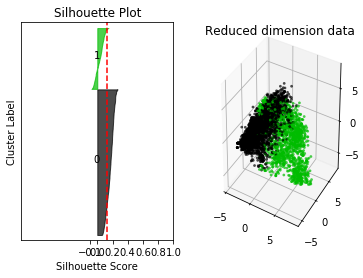

In [3]:
result = manager.clustering_analysis_BERT_token_kmeans('VP1617STRICT', 'you', '-1', plot_fig=True)

In [4]:
print(result[0])
print(result[2])
print(result[3])

2
0.12668052579605324
[(2, 0.12668052579605324), (4, 0.08567911350388131), (6, 0.08183151830472025), (8, 0.08323311410104021), (10, 0.09349062323650638), (12, 0.09777944852364222), (14, 0.10268623160003207)]


(4735, 768)
2
0.1652826040781412


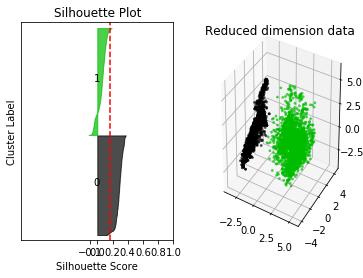

In [5]:
result = manager.clustering_analysis_BERT_token_kmeans('VP1617STRICT', 'you', '-12', plot_fig=True)
print(result[0])
print(result[2])

(4735, 768)


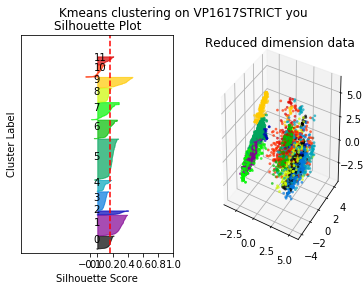

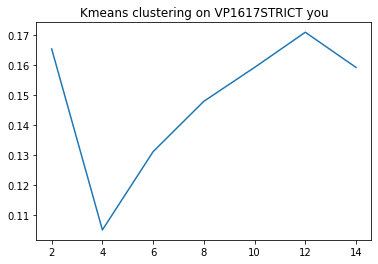

(12, KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
        n_clusters=12, n_init=30, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0), 0.17082915317099343, [(2,
   0.1652826040781412),
  (4, 0.1050085668238495),
  (6, 0.13107185105931246),
  (8, 0.14783860540930507),
  (10, 0.1591226260957691),
  (12, 0.17082915317099343),
  (14, 0.1591091084517472)])

In [4]:
if not os.path.isdir('./data/bert_embed_clustering/VP1617STRICT/you'):
    os.makedirs('./data/bert_embed_clustering/VP1617STRICT/you')
manager.clustering_analysis_BERT_token_kmeans('VP1617STRICT', 'you', '-12', plot_fig=True, 
                                              output='./data/bert_embed_clustering/VP1617STRICT/you')

